In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read and Explore the Datasets

You can find the dataset [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [44]:
file_path = 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are `1470` rows and `35` columns in the dataset.

There are no missing values in the dataset.

There are `26` numerical and `9` categorical features.

## EDA

In [47]:
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

The target variable is imbalanced.

### Explore Numerical Features

In [57]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

Make target varaible numerical.

In [59]:
cat_features = df.select_dtypes(include='object')
num_features =df.select_dtypes(include=['int64', 'float64'])

Identified numerical and categorical features.

In [65]:
# Compute correlations with Attrition
correlation_matrix = num_features.corr()

# Extract only Attrition correlations
attrition_corr = correlation_matrix["Attrition"].drop("Attrition")

# Sort by absolute correlation values
top_features = attrition_corr.abs().sort_values(ascending=False)

# Display the top 10 most correlated features
print(top_features.head(10))

TotalWorkingYears       0.171063
JobLevel                0.169105
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
YearsAtCompany          0.134392
JobInvolvement          0.130016
JobSatisfaction         0.103481
Name: Attrition, dtype: float64


These features are the ones that have the most effect on the target.

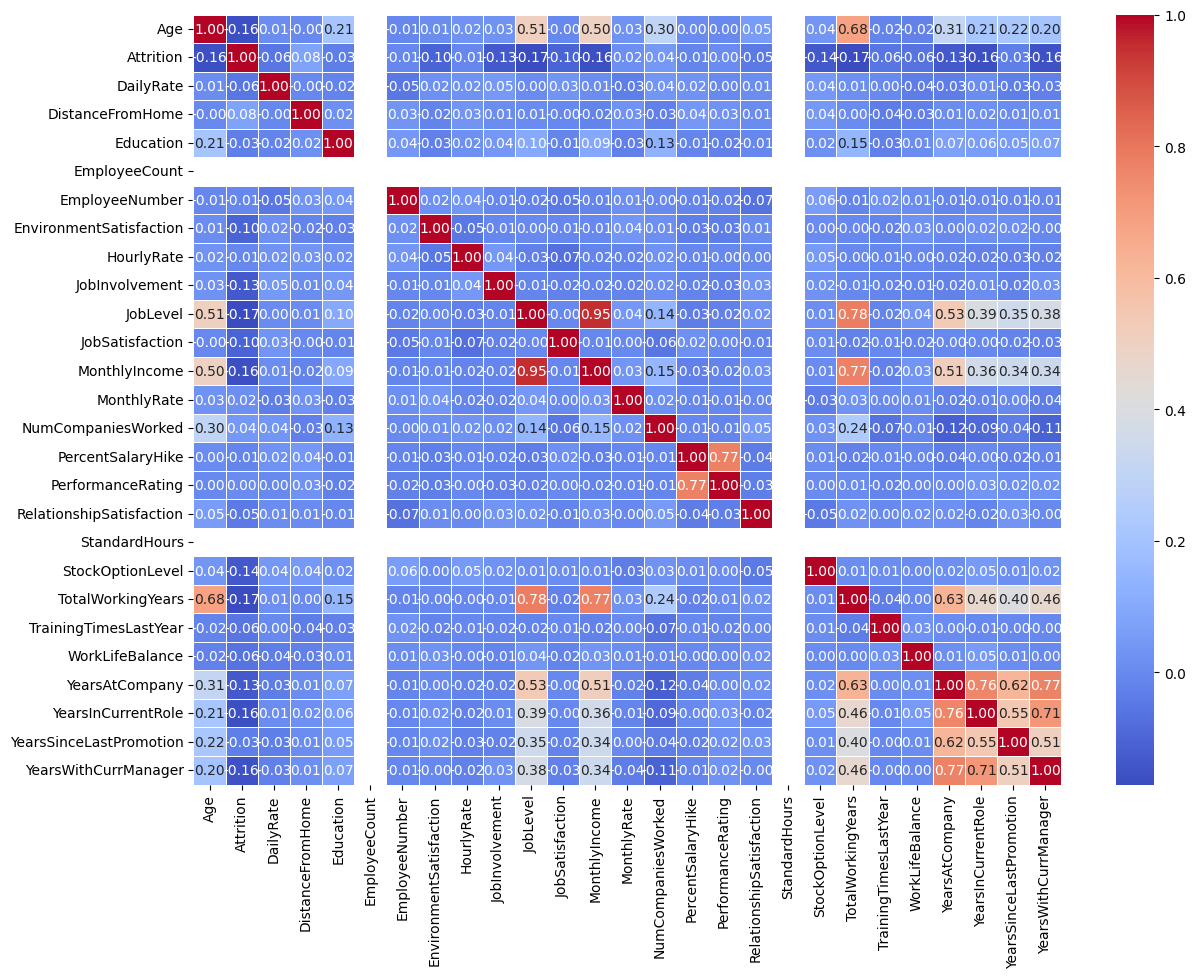

In [62]:
plt.figure(figsize=(14,10))
sns.heatmap(num_features.corr(), cmap='coolwarm', annot=True, linewidth=0.5, fmt='.02f')
plt.show()

In [48]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


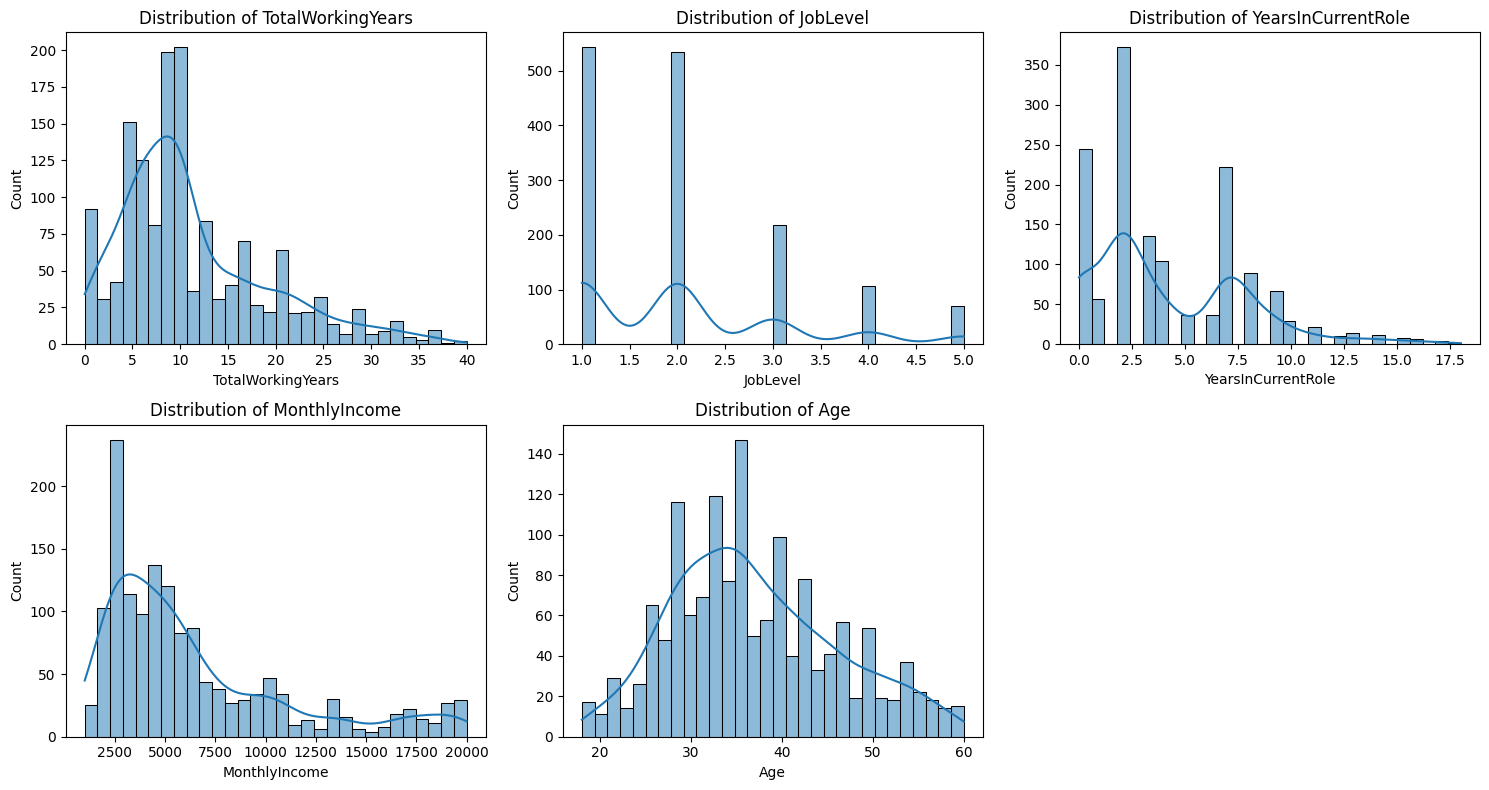

In [66]:
# Define top 5 correlated features
top_features = ["TotalWorkingYears", "JobLevel", "YearsInCurrentRole", "MonthlyIncome", "Age"]

# Plot histograms
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

Right-Skewed (Positively Skewed) Distributions:

✅ TotalWorkingYears, MonthlyIncome, YearsInCurrentRole

Most employees have low to mid values, but a few have very high values.

This suggests that a small group of employees has much higher experience, income, or tenure than the majority.

Roughly Normal Distribution:

✅ Age

Most employees are in their 30s-40s, with fewer in their 20s or 50s.

This is a typical workforce distribution.

Uniform or Discrete-Like Distribution:

✅ JobLevel

Since JobLevel is categorical (integer values 1-5), it appears evenly distributed but with peaks at each level.

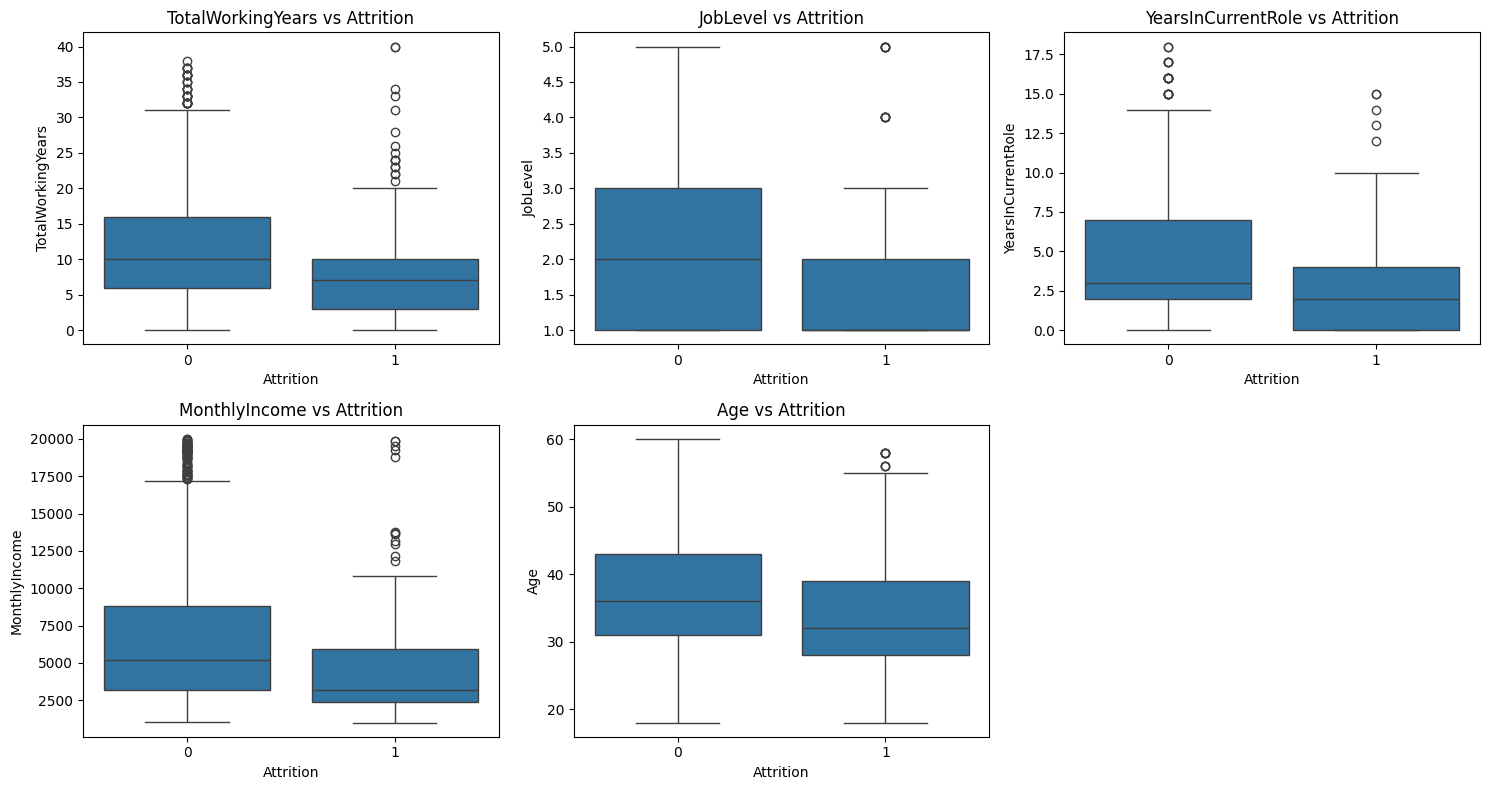

In [67]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["Attrition"], y=df[feature])
    plt.title(f"{feature} vs Attrition")

plt.tight_layout()
plt.show()

From these insights, we can infer: 

✅ Low-income, lower-level, and less-experienced employees leave more.

✅ Younger employees are at higher risk of leaving.

✅ Employees who stay longer in their role or company are more stable.

### Ctegorical Features

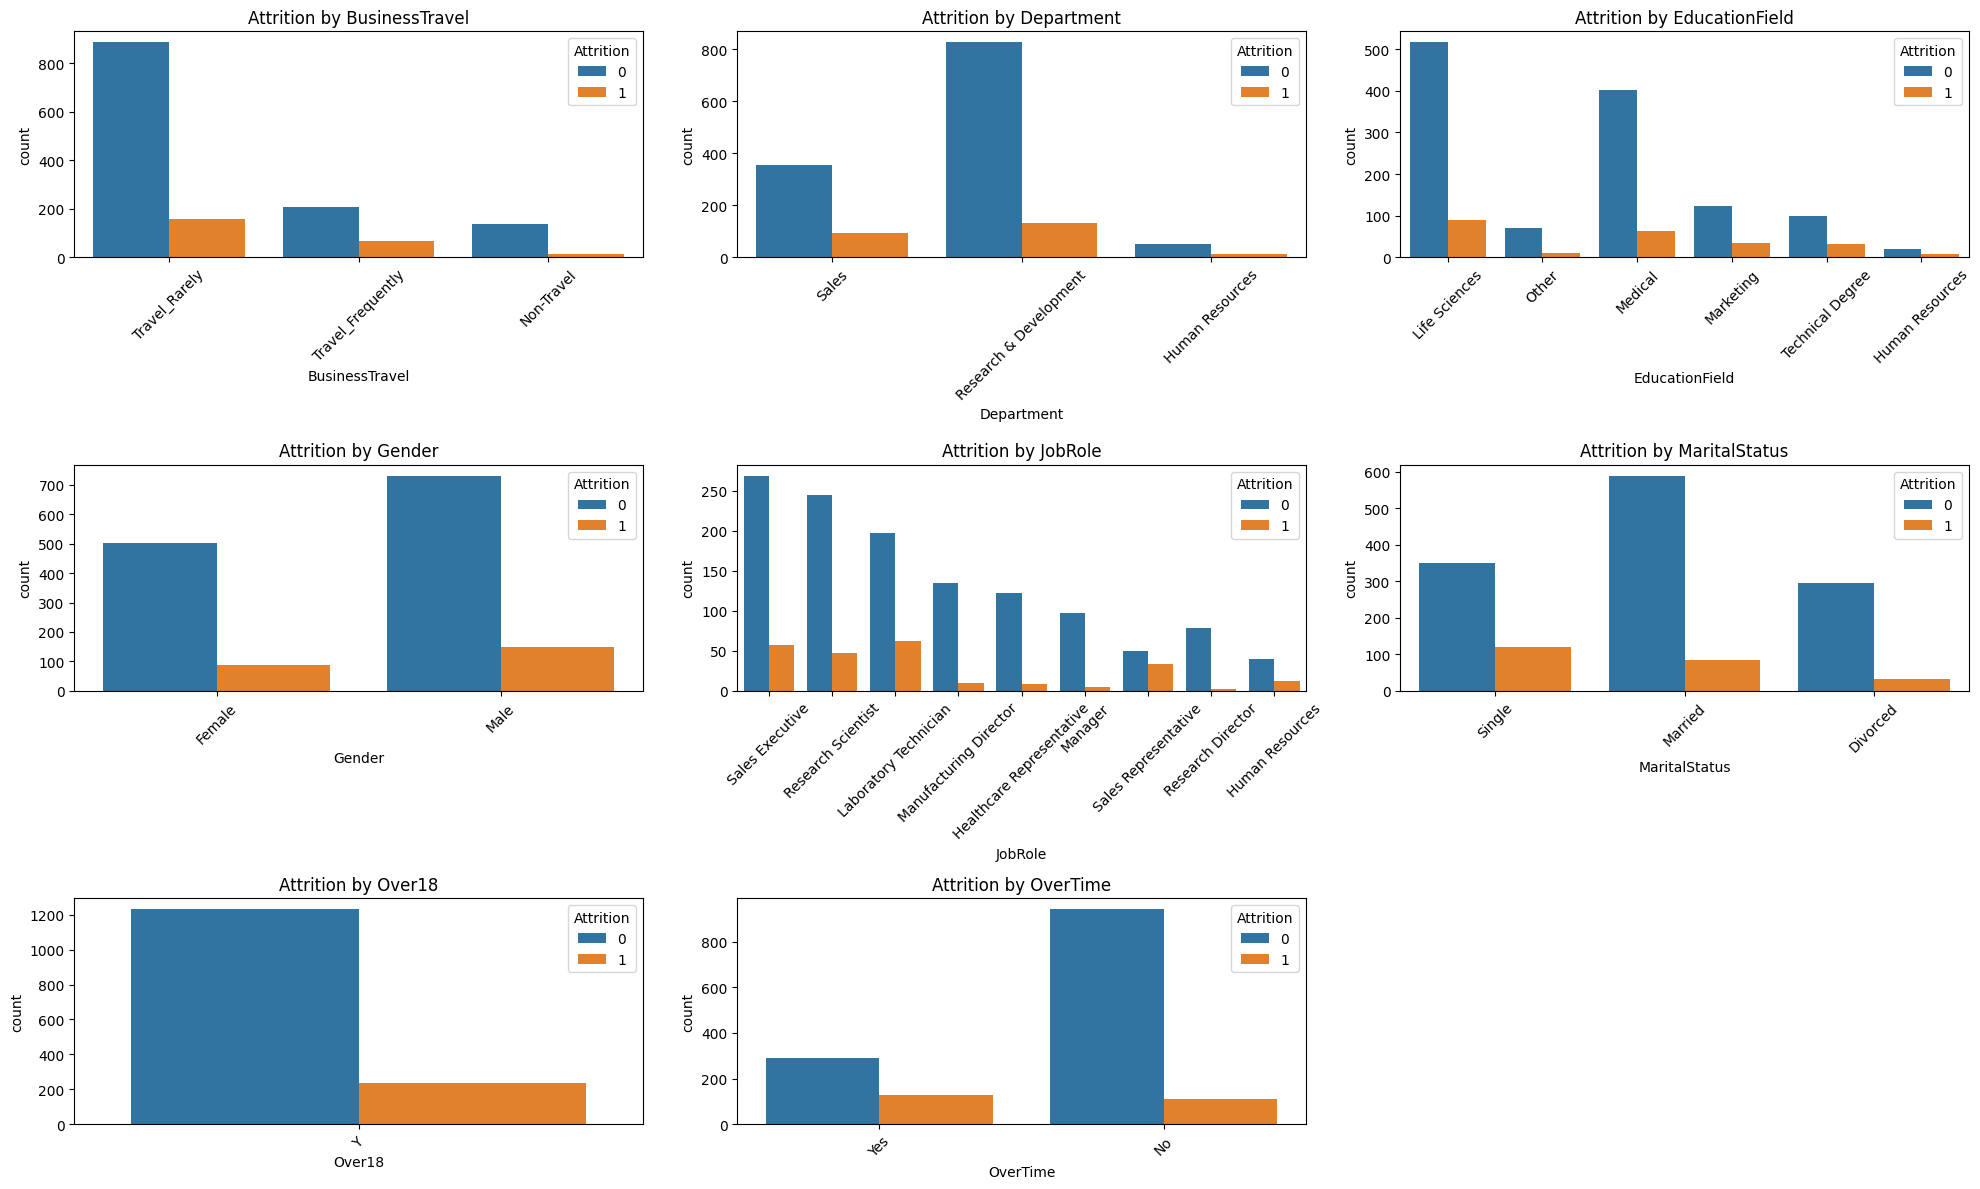

In [91]:
plt.figure(figsize=(20, 12))

# Loop through categorical features and plot them
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of categorical features
    sns.countplot(data=df, x=col, hue="Attrition")
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()